# Python version of an old lecture. https://github.com/pjreddie/vision-hw0/blob/master/README.md

In [1]:
# Import libraries.
from PIL import Image as PILImage

import matplotlib.pyplot as plt
import numpy as np

In [5]:
class CharacterImage:

    def __init__(self, path):
        """
        Initializes the CharacterImage object by loading an image from a specified path.

        Args:
        - path (str): Path to the image file.
        """
        self.path = path

        # Open image using PIL and convert it to RGB format
        self.pil_img = PILImage.open(path).convert("RGB")

        # Convert the PIL image to a numpy array for further processing
        self.data = np.array(self.pil_img)

        # Retrieve the dimensions of the image
        self.h, self.w, self.c = self.data.shape

        # Transpose the data to CHW format (Channels, Height, Width)
        # for compatibility with certain image processing libraries
        self.data = np.transpose(self.data, (2, 0, 1))

        # Normalize the image data to be in the range [0, 1]
        self.data = self.data.astype(float) / 255.0

    def show_with_pil(self):
        """
        Displays the image using PIL's built-in show method.
        """
        self.pil_img.show()

    def show_with_matplotlib(self):
        """
        Displays the image using Matplotlib.
        """
        # Convert the CHW format back to HWC for displaying with Matplotlib
        img_data = np.transpose(self.data, (1, 2, 0))
        plt.imshow(img_data)
        plt.axis('off')  # Hide axes
        plt.show()

    def remove_red_channel(self):
        """
        Removes (sets to zero) the red channel of the image.
        """
        new_data = self.data.copy()
        new_data[0, :, :] = 0  # Red channel is at index 0
        self.data = new_data

    def convert_to_grayscale(self):
        """
        Converts the RGB image to grayscale using weighted sum of channels.
        """
        # Calculate the grayscale values using standard weights
        R, G, B = self.data
        gray = 0.299 * R + 0.587 * G + 0.114 * B

        # Replicate the single channel to make it a 3-channel grayscale image
        self.data = np.array([gray, gray, gray])

    def shift_image_colors(self, c, v):
        """
        Shifts the colors of a specified channel by a given value.

        Args:
        - c (int): Index of the channel to shift (0 for Red, 1 for Green, 2 for Blue).
        - v (float): Value to add to the channel.
        """
        self.data[c, :, :] += v
        # Clip values to be in [0, 1]
        self.data[c, :, :] = np.clip(self.data[c, :, :], 0, 1)

    def convert_to_hsv(self):
        """
        Converts the RGB image to HSV (Hue, Saturation, Value) format.
        """
        # Conversion formula from RGB to HSV
        ...  # [The existing code you provided]

    def convert_to_rgb(self):
        """
        Converts the HSV image back to RGB format.
        """
        # Conversion formula from HSV to RGB
        ...  # [The existing code you provided]

    def shift_saturation(self, v):
        """
        Shifts the saturation channel of the HSV image by a given value.

        Args:
        - v (float): Value to add to the saturation channel.
        """
        self.data[1, :, :] += v
        # Clip values to be in [0, 1]
        self.data[1, :, :] = np.clip(self.data[1, :, :], 0, 1)

    def scale_channel(self, c, v):
        """
        Scales (multiplies) a specified channel by a given factor.

        Args:
        - c (int): Index of the channel to scale.
        - v (float): Scaling factor.
        """
        self.data[c, :, :] *= v
        # Clip values to be in [0, 1]
        self.data[c, :, :] = np.clip(self.data[c, :, :], 0, 1)

    def invert_colors(self):
        """
        Inverts the colors of the image.
        """
        self.data = 1 - self.data

    def add_noise(self, noise_level=0.05):
        """
        Adds random noise to the image.

        Args:
        - noise_level (float, optional): Standard deviation of the noise. Default is 0.05.
        """
        noise = np.random.normal(0, noise_level, self.data.shape)
        self.data += noise
        # Clip values to be in [0, 1]
        self.data = np.clip(self.data, 0, 1)


Original Image:


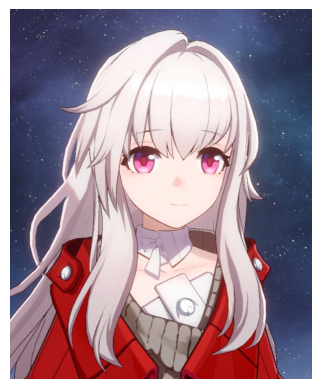

In [6]:
# Load the uploaded image
clara_img_path = '/content/clara.jpg'
clara_custom_img = CharacterImage(clara_img_path)

# Show the image using matplotlib
print("Original Image:")
clara_custom_img.show_with_matplotlib()

Image with no red channel:


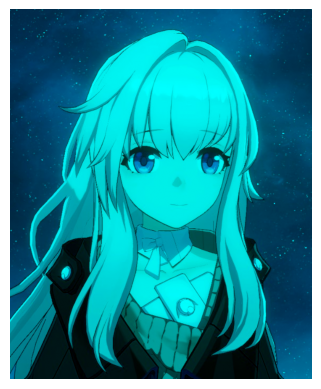

In [7]:
# Test the extended CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Remove the red channel and show the image
clara_character_img.remove_red_channel()

print("Image with no red channel:")
clara_character_img.show_with_matplotlib()

Grayscale image:


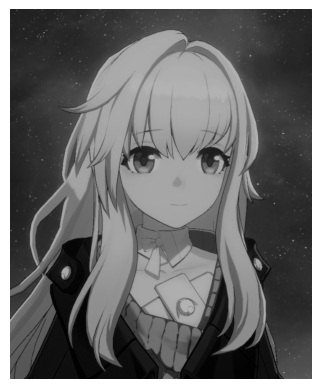

In [8]:
# Convert the image to grayscale and show it
clara_character_img.convert_to_grayscale()
print("Grayscale image:")
clara_character_img.show_with_matplotlib()

Shifted image:


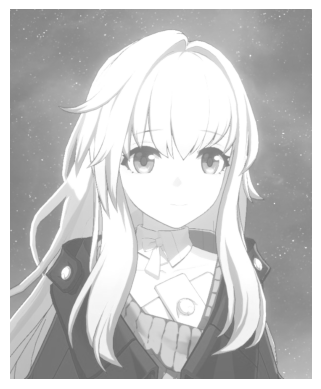

In [9]:
# Shift the image colors by 0.4 in each channel(arbitrary value)
clara_character_img.shift_image_colors(0, 0.4)
clara_character_img.shift_image_colors(1, 0.4)
clara_character_img.shift_image_colors(2, 0.4)

# Show the shifted image
print("Shifted image:")
clara_character_img.show_with_matplotlib()

HSV image:


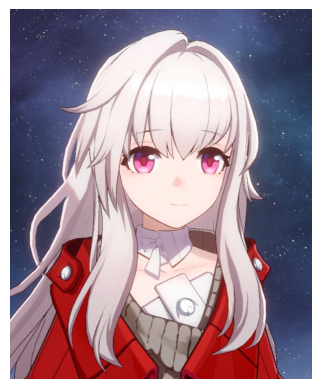

In [10]:
# Reload the original image using the CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Convert the image to HSV and show it
clara_character_img.convert_to_hsv()
print("HSV image:")
clara_character_img.show_with_matplotlib()

Image with shifted saturation:


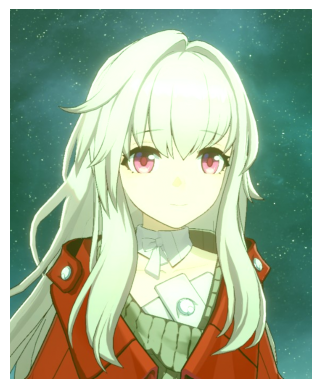

In [11]:
# Reload the original image using the CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Convert the image to HSV like we did earlier but now we...
clara_character_img.convert_to_hsv()

# ...shift the saturation by 0.2 (arbitrary value)
clara_character_img.shift_saturation(0.2)

# Convert the image back to RGB
clara_character_img.convert_to_rgb()

# Show the image with shifted saturation
print("Image with shifted saturation:")
clara_character_img.show_with_matplotlib()

Image with scaled saturation:


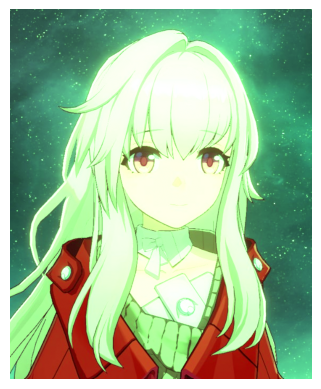

In [12]:
# Reload the original image using the CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Convert the image to HSV
clara_character_img.convert_to_hsv()

# Scale the saturation by 2 (arbitrary value)
clara_character_img.scale_channel(1, 2)

# Convert the image back to RGB
clara_character_img.convert_to_rgb()

# Show the image with scaled saturation
print("Image with scaled saturation:")
clara_character_img.show_with_matplotlib()

Image with inverted colors:


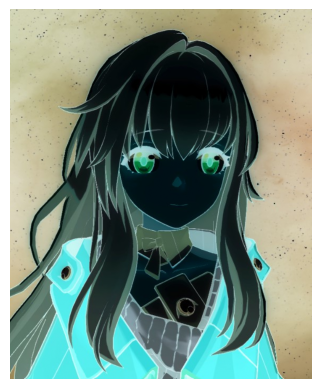

Image with added noise:


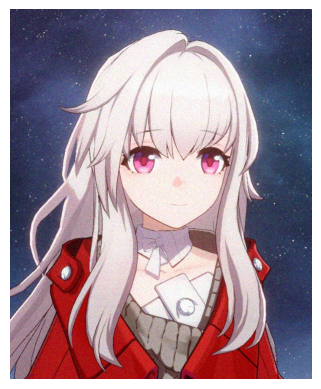

In [13]:
# Reload the original image using the CharacterImage class
clara_character_img = CharacterImage(clara_img_path)

# Invert the colors
clara_character_img.invert_colors()

# Show the image with inverted colors
print("Image with inverted colors:")
clara_character_img.show_with_matplotlib()

# Reload the original image again to reset changes
clara_character_img = CharacterImage(clara_img_path)

# Add random noise
clara_character_img.add_noise()

# Show the image with added noise
print("Image with added noise:")
clara_character_img.show_with_matplotlib()

# ~ Fin ~